In [12]:
# NOTEBOOK FOR NAIVE
%matplotlib inline
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os

In [13]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

In [14]:
# NOTE: Need to use 7-zip or similar program to unzip the .gz files listed in this cell in the directory called in the .mmread function below. 
# input_dir = 'C:/Users/colek/Desktop/Roy Lab/CITE-Seq Data/naive10xdata/naive10xdata/outs/filtered_feature_bc_matrix'
input_dir = 'Y:/Cole Keenum/CITE-seq files/naive10xdata/outs/filtered_feature_bc_matrix'

counts_matrix = scipy.io.mmread(input_dir + '/matrix.mtx/matrix.mtx').T.tocsc()
genes = np.array(scr.load_genes(input_dir + '/features.tsv/features.tsv', delimiter='\t', column=1))

print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))
print('Number of genes in gene list: {}'.format(len(genes)))

Counts matrix shape: 3109 rows, 32473 columns
Number of genes in gene list: 32473


In [16]:
# save test txt file for confirmation with Read10X() in R Seurat package
np.savetxt('test_naive.txt', counts_matrix[0:10,].toarray(), fmt='%s')

In [17]:
scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.023, random_state=0) #~3000 cells recovered, at ~2.3% rate
# See page 11: https://assets.ctfassets.net/an68im79xiti/4oB71TeT0kDoIHhfq9dPxd/05ce9121d027715321d2a9765b1e9b70/CG000331_ChromiumNextGEMSingleCell5_v2_UserGuide_RevA.pdf


In [18]:
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.30
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 10.3%
Overall doublet rate:
	Expected   = 2.3%
	Estimated  = 1.6%
Elapsed time: 7.3 seconds


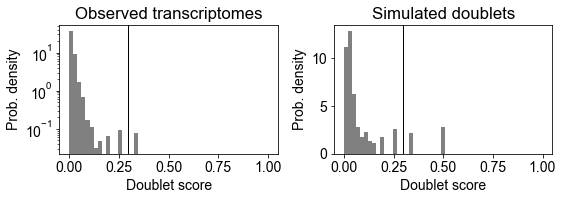

In [19]:
scrub.plot_histogram();

Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 21.5%
Overall doublet rate:
	Expected   = 2.3%
	Estimated  = 2.7%


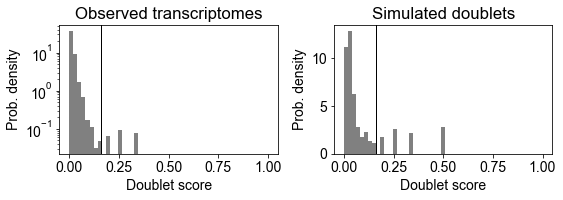

In [20]:
scrub.call_doublets(threshold=0.16)
scrub.plot_histogram();

In [21]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

Running UMAP...
Done.


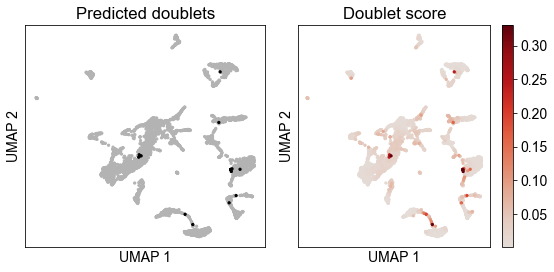

In [22]:
scrub.plot_embedding('UMAP', order_points=True);

# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [23]:
import pandas as pd
df = pd.DataFrame({
    'doublet_score': scrub.doublet_scores_obs_,
    'predicted_doublet': scrub.predicted_doublets_
})
df.to_csv('scrublet_output_table_naive.csv', index=False)